---
Rapid EDA
---
---

### General Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

### Read the dataset

In [9]:
# Read the dataset
df = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 4/Rapid /ufo_complete_sightings/complete.csv', on_bad_lines='skip')
df.head()

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_53905/3074492702.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 4/Rapid /ufo_complete_sightings/complete.csv', on_bad_lines='skip')


datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   

    longitude  
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


I think we should clean the missing values in the data and standardize column name and date

### Clean and standardize the data

In [11]:
# Handle missing values by imputing unknown 
df['state'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['shape'].fillna('unknown', inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert datetime and date_posted column to proper datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# END: Clean and standardize the data

df.head()

datetime                  city    state  country     shape  \
0 1949-10-10 20:30:00            san marcos       tx       us  cylinder   
1 1949-10-10 21:00:00          lackland afb       tx  unknown     light   
2 1955-10-10 17:00:00  chester (uk/england)  unknown       gb    circle   
3 1956-10-10 21:00:00                  edna       tx       us    circle   
4 1960-10-10 20:00:00               kaneohe       hi       us     light   

  duration_seconds duration_hours/min  \
0             2700         45 minutes   
1             7200            1-2 hrs   
2               20         20 seconds   
3               20           1/2 hour   
4              900         15 minutes   

                                            comments date_posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53.2   
3  My older brother and twin sister were leaving ...   1/17/2004  28.9783333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.4180556   

    longitude  
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

In [15]:
# Standardize the date_posted column to proper datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

df.head()

datetime                  city    state  country     shape  \
0 1949-10-10 20:30:00            san marcos       tx       us  cylinder   
1 1949-10-10 21:00:00          lackland afb       tx  unknown     light   
2 1955-10-10 17:00:00  chester (uk/england)  unknown       gb    circle   
3 1956-10-10 21:00:00                  edna       tx       us    circle   
4 1960-10-10 20:00:00               kaneohe       hi       us     light   

  duration_seconds                                           comments  \
0             2700  This event took place in early fall around 194...   
1             7200  1949 Lackland AFB&#44 TX.  Lights racing acros...   
2               20  Green/Orange circular disc over Chester&#44 En...   
3               20  My older brother and twin sister were leaving ...   
4              900  AS a Marine 1st Lt. flying an FJ4B fighter/att...   

  date_posted    latitude   longitude  
0  2004-04-27  29.8830556  -97.941111  
1  2005-12-16    29.38421  -98.581082  
2  2008-01-21        53.2   -2.916667  
3  2004-01-17  28.9783333  -96.645833  
4  2004-01-22  21.4180556 -157.803611

I will drop the duration_hours/min because will use only duration_seconds. And should check the unique values of each column

In [14]:
# Check unique values for each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

# Drop the 'duration_hours/min' column
df.drop(columns=['duration_hours/min'], inplace=True)

# Display the dataframe to confirm the column is dropped
df.head()


Unique values in datetime: 75093
Unique values in city: 22018
Unique values in state: 69
Unique values in country: 6
Unique values in shape: 29
Unique values in duration_seconds: 732
Unique values in duration_hours/min: 9791
Unique values in comments: 88283
Unique values in date_posted: 317
Unique values in latitude: 25428
Unique values in longitude: 20549


datetime                  city    state  country     shape  \
0 1949-10-10 20:30:00            san marcos       tx       us  cylinder   
1 1949-10-10 21:00:00          lackland afb       tx  unknown     light   
2 1955-10-10 17:00:00  chester (uk/england)  unknown       gb    circle   
3 1956-10-10 21:00:00                  edna       tx       us    circle   
4 1960-10-10 20:00:00               kaneohe       hi       us     light   

  duration_seconds                                           comments  \
0             2700  This event took place in early fall around 194...   
1             7200  1949 Lackland AFB&#44 TX.  Lights racing acros...   
2               20  Green/Orange circular disc over Chester&#44 En...   
3               20  My older brother and twin sister were leaving ...   
4              900  AS a Marine 1st Lt. flying an FJ4B fighter/att...   

  date_posted    latitude   longitude  
0   4/27/2004  29.8830556  -97.941111  
1  12/16/2005    29.38421  -98.581082  
2   1/21/2008        53.2   -2.916667  
3   1/17/2004  28.9783333  -96.645833  
4   1/22/2004  21.4180556 -157.803611

In [16]:
df.isnull().sum()

datetime            1220
city                   0
state                  0
country                0
shape                  0
duration_seconds       2
comments              35
date_posted            0
latitude               0
longitude              0
dtype: int64

In [17]:
# Drop rows with missing values
df.dropna(inplace=True)

# Display the dataframe to confirm the missing values are dropped
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87427 entries, 0 to 88678
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          87427 non-null  datetime64[ns]
 1   city              87427 non-null  object        
 2   state             87427 non-null  object        
 3   country           87427 non-null  object        
 4   shape             87427 non-null  object        
 5   duration_seconds  87427 non-null  object        
 6   comments          87427 non-null  object        
 7   date_posted       87427 non-null  datetime64[ns]
 8   latitude          87427 non-null  object        
 9   longitude         87427 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 7.3+ MB


## EDA

### Temporal Patterns by Decade and Seasonality

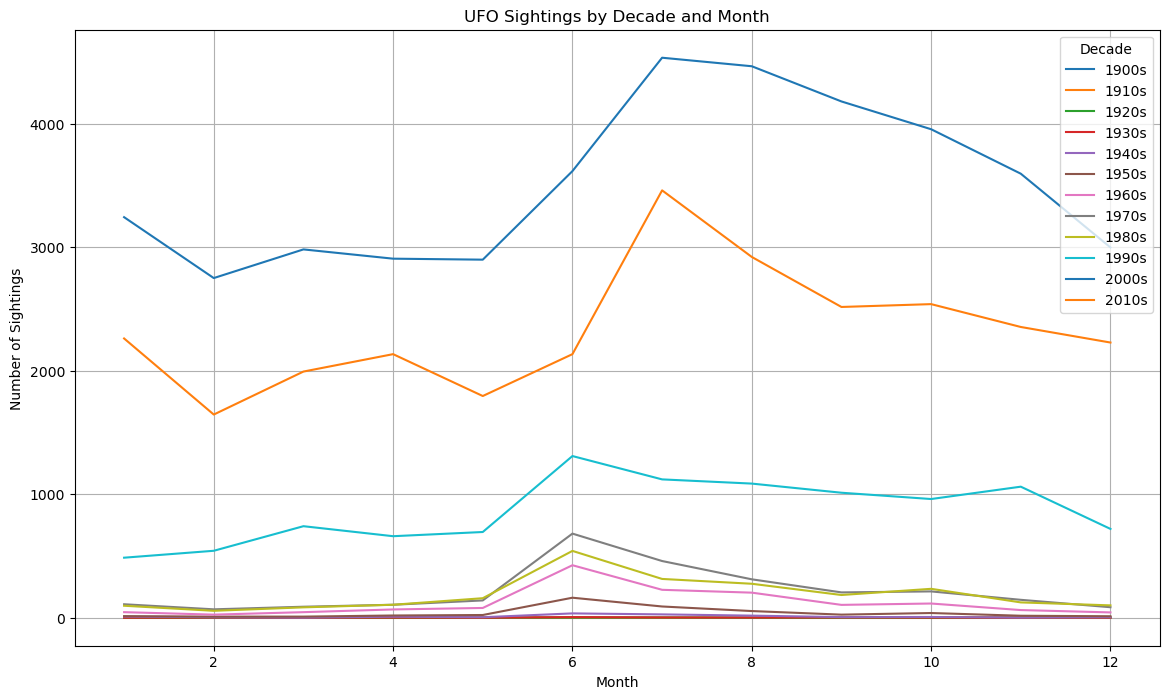

In [18]:
# Extract the year and month from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Create a new column for the decade
df['decade'] = (df['year'] // 10) * 10

# Group by decade and month to get the count of sightings
decade_monthly_counts = df.groupby(['decade', 'month']).size().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(14, 8))
for decade in decade_monthly_counts.index:
    plt.plot(decade_monthly_counts.columns, decade_monthly_counts.loc[decade], label=f'{decade}s')

plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings by Decade and Month')
plt.legend(title='Decade')
plt.grid(True)
plt.show()

### Duration Anomaly Detection

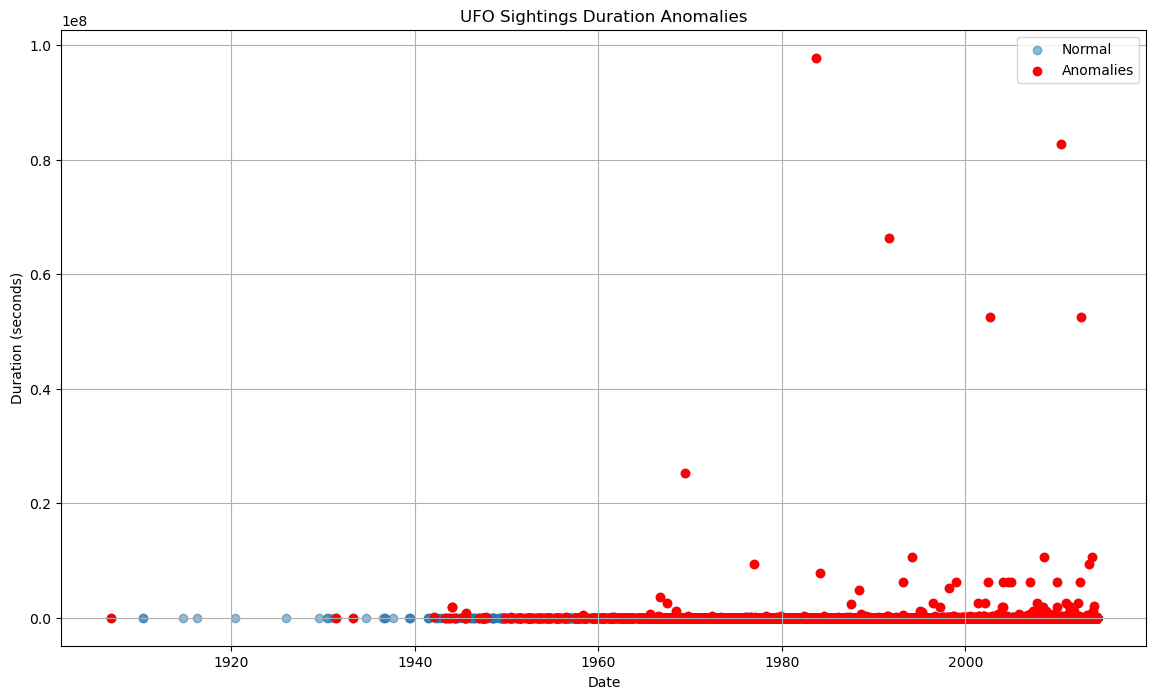

datetime          city state  country     shape  \
0  1949-10-10 20:30:00    san marcos    tx       us  cylinder   
1  1949-10-10 21:00:00  lackland afb    tx  unknown     light   
12 1970-10-10 16:00:00      bellmore    ny       us      disk   
17 1973-10-10 19:00:00       niantic    ct       us      disk   
20 1974-10-10 19:30:00        hudson    ma       us     other   

    duration_seconds                                           comments  \
0             2700.0  This event took place in early fall around 194...   
1             7200.0  1949 Lackland AFB&#44 TX.  Lights racing acros...   
12            1800.0           silver disc seen by family and neighbors   
17            1800.0  Oh&#44 what a night &#33  Two (2) saucer-shape...   
20            2700.0  Not sure of the eact month or year of this sig...   

   date_posted    latitude  longitude  year  month  decade  
0   2004-04-27  29.8830556 -97.941111  1949     10    1940  
1   2005-12-16    29.38421 -98.581082  1949     10    1940  
12  2000-05-11  40.6686111 -73.527500  1970     10    1970  
17  2003-09-24  41.3252778 -72.193611  1973     10    1970  
20  1999-08-10  42.3916667 -71.566667  1974     10    1970

In [20]:
# Identify anomalies using the IQR method
anomalies = df[(df['duration_seconds'] < lower_bound) | (df['duration_seconds'] > upper_bound)]

# Plot the anomalies
plt.figure(figsize=(14, 8))
plt.scatter(df['datetime'], df['duration_seconds'], label='Normal', alpha=0.5)
plt.scatter(anomalies['datetime'], anomalies['duration_seconds'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.title('UFO Sightings Duration Anomalies')
plt.legend()
plt.grid(True)
plt.show()

# Display the anomalies
anomalies.head()

In [36]:
# Remove anomalies
#df_cleaned = df[(df['duration_seconds'] >= lower_bound) & (df['duration_seconds'] <= upper_bound)]

# Display the cleaned dataframe
#df_cleaned.info()

### Shape Correlation with Duration

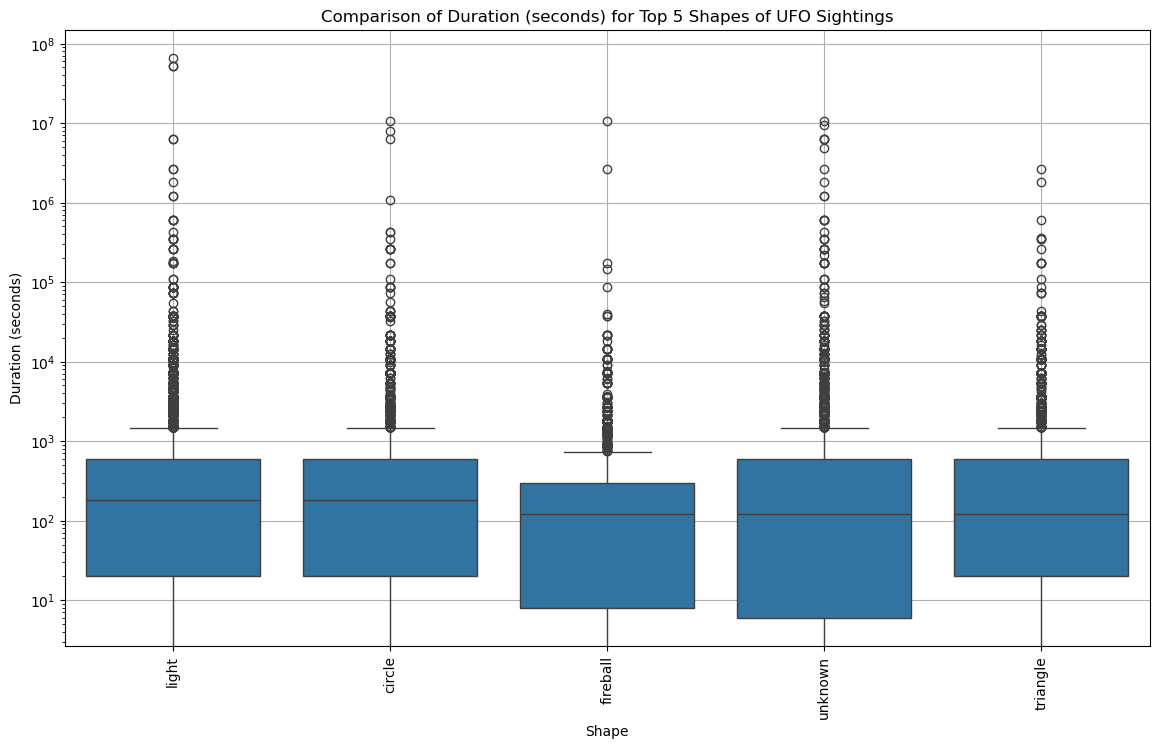

In [30]:
# Get the top 5 shapes based on the count of sightings
top_shapes = df['shape'].value_counts().nlargest(5).index

# Filter the dataframe to include only the top 5 shapes
df_top_shapes = df[df['shape'].isin(top_shapes)]

# Plotting box plots to compare duration (seconds) for different shapes
plt.figure(figsize=(14, 8))
sns.boxplot(x='shape', y='duration_seconds', data=df_top_shapes)
plt.yscale('log')  # Use log scale for better visualization
plt.xlabel('Shape')
plt.ylabel('Duration (seconds)')
plt.title('Comparison of Duration (seconds) for Top 5 Shapes of UFO Sightings')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Most UFO shapes have similar durations, with a high number of short sightings and a few very long outliers across all shapes.

### Country-Specific Analysis of Reporting Trends

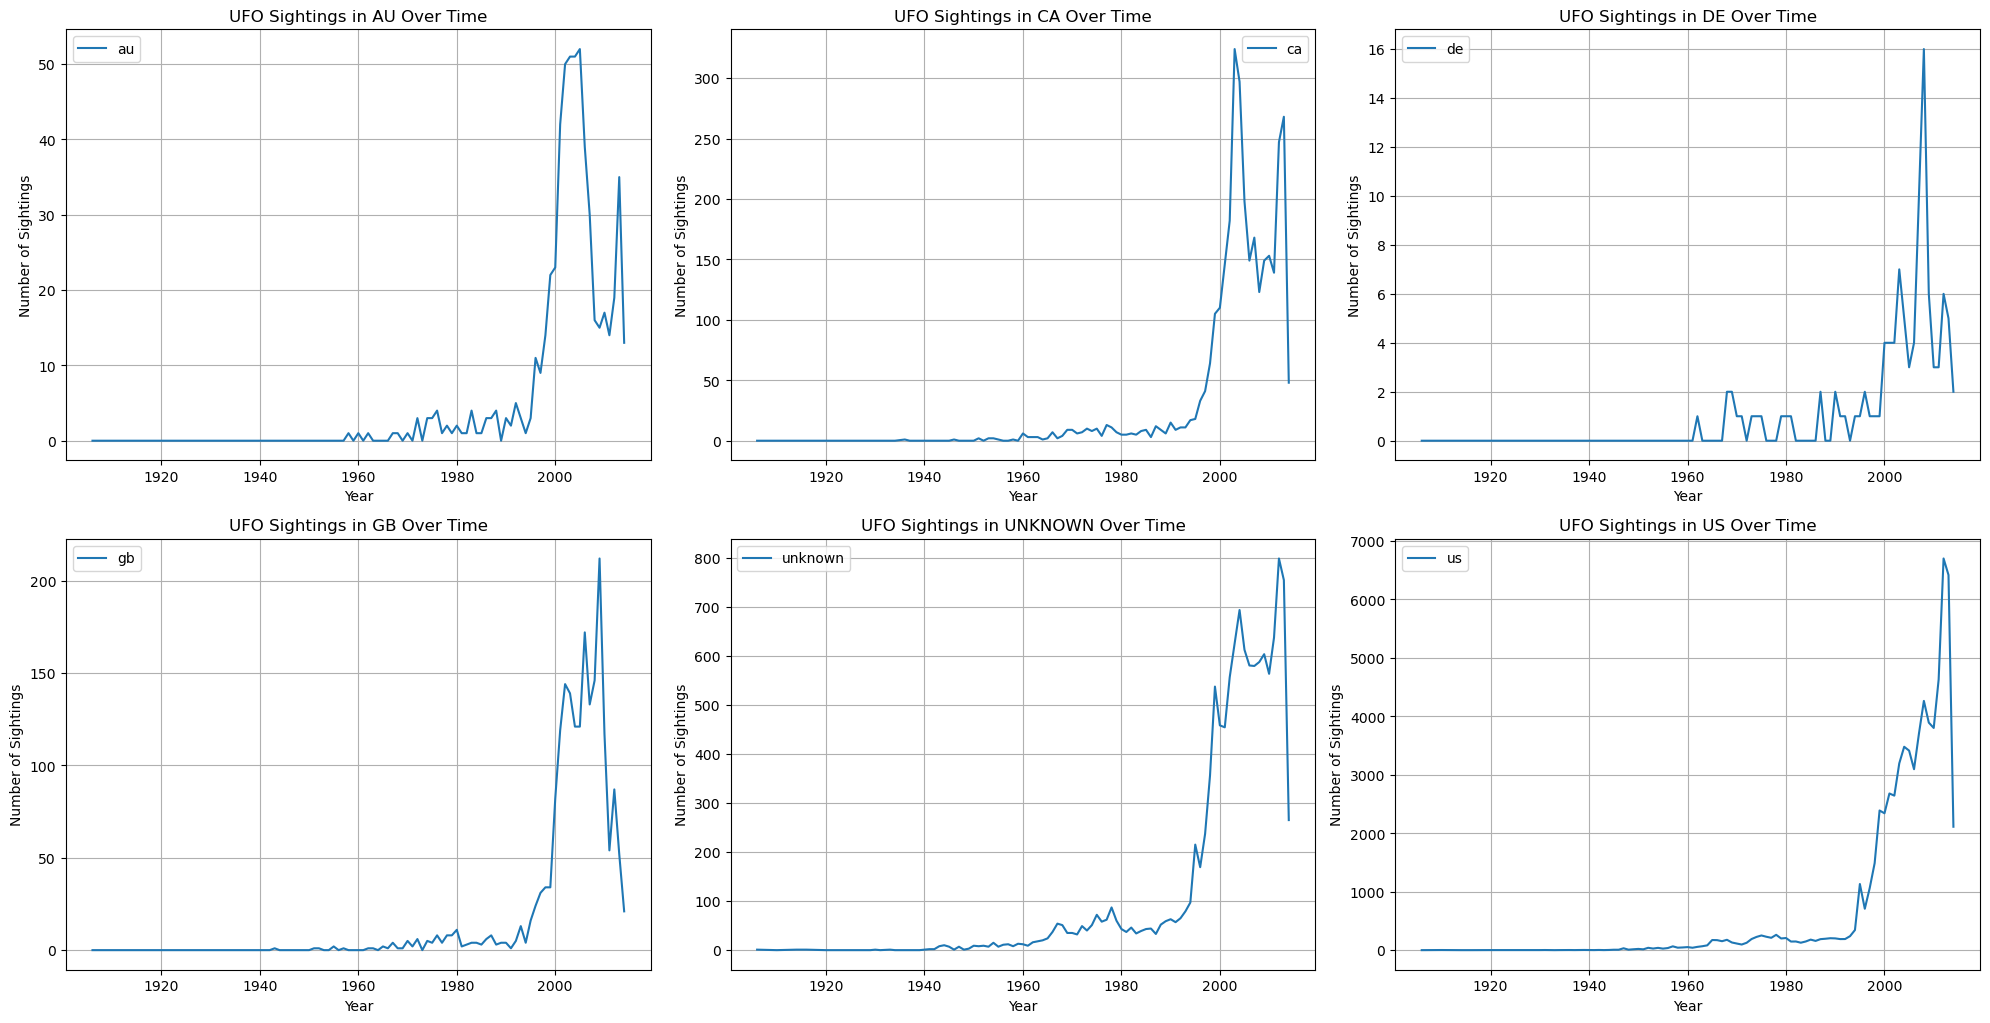

In [31]:
# Group the data by country and year to get the count of sightings per year for each country
country_yearly_counts = df.groupby(['country', 'year']).size().unstack().fillna(0)

# Plot the data using small multiples of line charts for different countries
countries = country_yearly_counts.index

plt.figure(figsize=(20, 15))
for i, country in enumerate(countries, 1):
    plt.subplot(len(countries) // 3 + 1, 3, i)
    plt.plot(country_yearly_counts.columns, country_yearly_counts.loc[country], label=country)
    plt.xlabel('Year')
    plt.ylabel('Number of Sightings')
    plt.title(f'UFO Sightings in {country.upper()} Over Time')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Analysis of Report Timing (Day vs. Night)

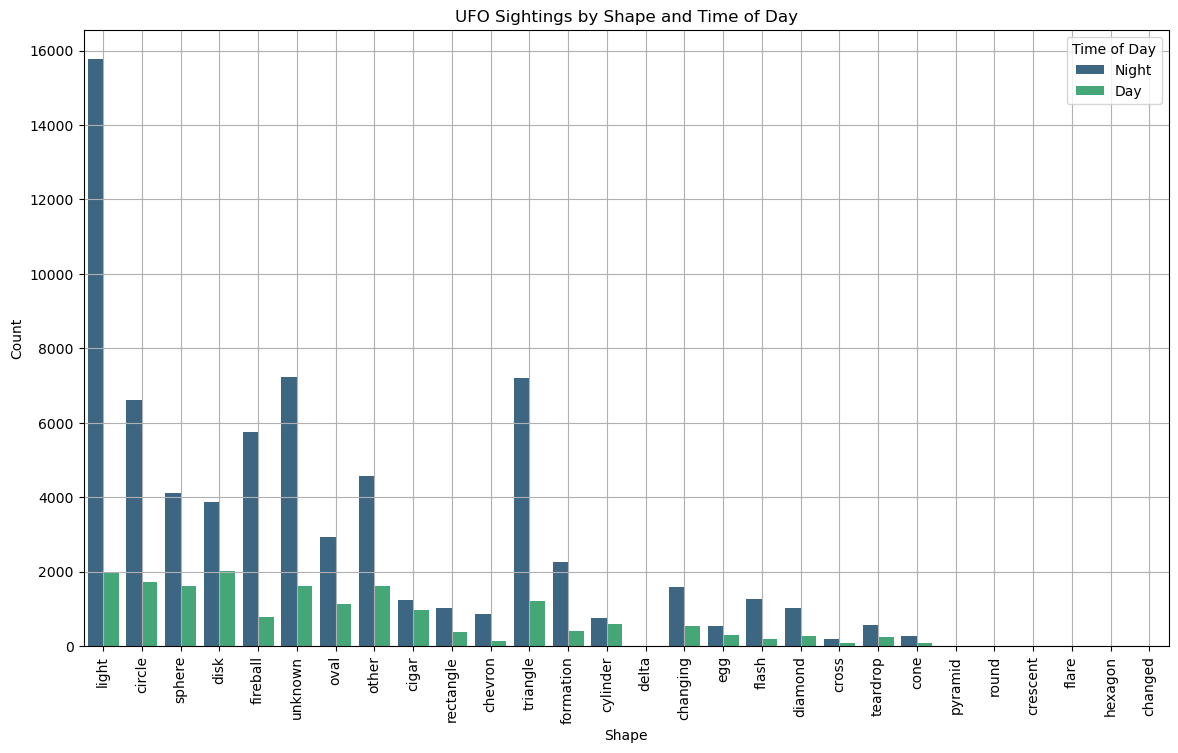

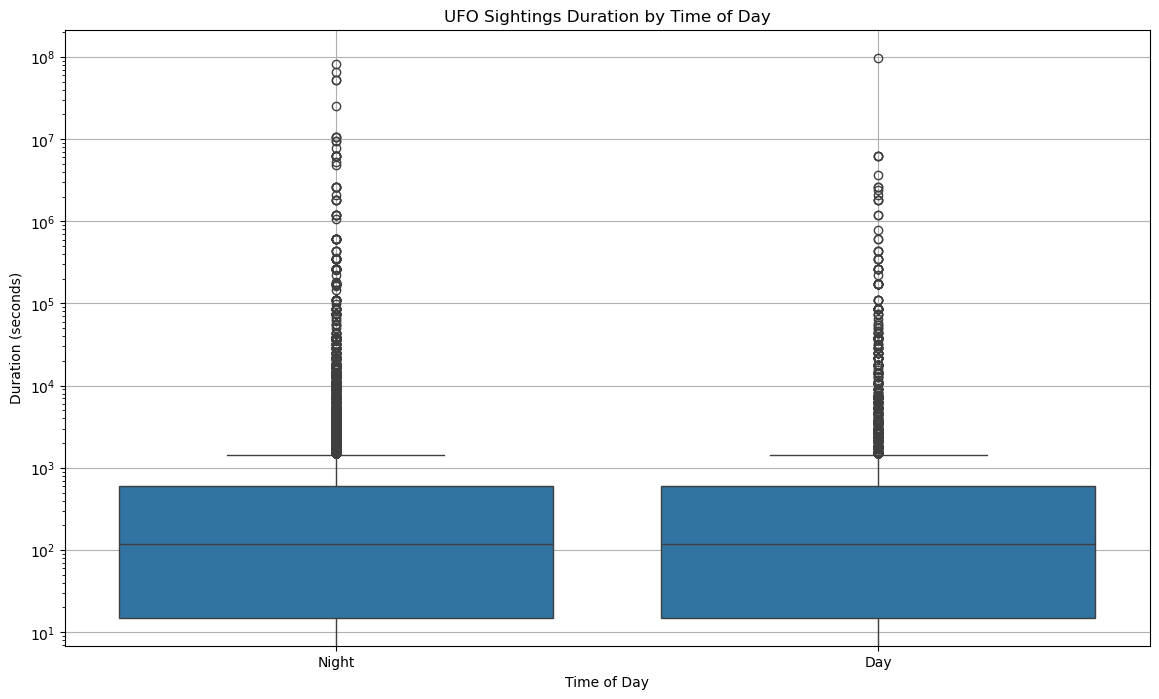

In [32]:
# Convert datetime into categorical (day/night)
df['hour'] = df['datetime'].dt.hour
df['time_of_day'] = np.where((df['hour'] >= 6) & (df['hour'] < 18), 'Day', 'Night')

# Correlate time of day with shape
plt.figure(figsize=(14, 8))
sns.countplot(x='shape', hue='time_of_day', data=df, palette='viridis')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.title('UFO Sightings by Shape and Time of Day')
plt.xticks(rotation=90)
plt.legend(title='Time of Day')
plt.grid(True)
plt.show()

# Correlate time of day with duration
plt.figure(figsize=(14, 8))
sns.boxplot(x='time_of_day', y='duration_seconds', data=df)
plt.yscale('log')  # Use log scale for better visualization
plt.xlabel('Time of Day')
plt.ylabel('Duration (seconds)')
plt.title('UFO Sightings Duration by Time of Day')
plt.grid(True)
plt.show()

### Geospatial Heatmap with Timeline


In [41]:
import plotly.express as px
import pandas as pd

# Data preparation: Extract year and month from the datetime column
df['year_month'] = df['datetime'].dt.to_period('M').astype(str)

# Remove NaN values from latitude, longitude, and year_month columns
df = df.dropna(subset=['latitude', 'longitude', 'year_month'])

# Create a heatmap and add animation using Plotly
fig = px.density_mapbox(
    df, 
    lat='latitude', 
    lon='longitude', 
    z=None, 
    radius=10,
    center=dict(lat=39.8283, lon=-98.5795),  # US centered coordinates
    zoom=3,
    mapbox_style="carto-positron",
    animation_frame='year_month',  # column that animates the heatmap
    title='Geospatial Heatmap of UFO Sightings Over Time'
)

# 그래프 표시
fig.show()
